# WordCloud sobre o Covid-19

O objetivo desse Notebook é criar uma nuvem de palavras (WordCloud) a partir da frequência que elas aparecem no texto. O tamanho de cada palavra apresentada na nuvem é medido pela sua frequência no texto, ou seja, palavras maiores apareceram mais, e as menores, apareceram menos.

Para isso, vamos utilizar um conjunto de tweets coletados no twitter na data de 08/06/2020. O coletor que desenvolvi também está disponível no github e pode ser encontrado <a href="https://github.com/fcampos300/covid19/blob/master/tt_collect.py" target="blank">aqui</a>.

A coleta foi baseada nos seguintes termos:
<ul>
    <li>Covid</li>
    <li>Covid19</li>
    <li>Covid-19</li>
    <li>Corona Vírus</li>
</ul>

Primeiramente, é necessário o pacote WordCloud para a geração da nuvem de palavras. Caso não tenha o pacote, basta executar a "linha de código" abaixo que a instalação será executada. 

No caso do pacote já estar instalado no ambiente, essa etapa pode ser ignorada.

In [ ]:
!pip install wordcloud -q

Aqui vamos importar os pacotes que serão utilizados ao longo do notebook.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from urllib.request import urlopen
import re
import json

O arquivo com os tweets está disponível no github, então para poder utilizá-lo, vamos precisar usar o pacote urlopen, que importamos do urlib.request, no código acima.

In [2]:
with urlopen("https://raw.githubusercontent.com/fcampos300/covid19/master/dataset/2020-06-08_covid.json") as response:
    js = json.loads(response.read())

Após carregar o arquivo, precisamos fazer um tratamento preliminar antes de enviar para a nuvem de palavras.

O JSON tem alguns campos que não são necessários para essa análise, então, o primeiro passo é carregar dentro da variável "text" somente o campo correspondente a mensagem nos tweets e decartar o que não serve.

Agora já temos as mensagens, porém, como os dados foram coletados do Twitter, e não temos controle sobre o que os usuários postam, vamos fazer o seguinte:
<ul>
    <li>Retirar as URLs que são postadas junto com os textos</li>
    <li>Retirar os caracteres de escape que são utilizados nas mensagens pelo Twitter, como quebra de linha ("\n"), por exemplo</li>
    <li>Retirar palavras que não agregam valor a análise (normalmente chamadas de StopWords)</li>
</ul>

In [3]:
# Busca os textos nos tweets.
text = [js['text'] for js in js]

# Retira as URLS dos textos.
text =  [re.sub(r"http\S+", "", text) for text in text]

# Retira os caracteres de escape.
text = [" ".join(re.findall("[^\n\t:.,]+", text)) for text in text]
                
# Retira palavras indesejadas nos textos.
stopwords = ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 
                'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 
                'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 
                'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 
                'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 
                'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 
                'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 
                'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 
                'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 
                'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 
                'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 
                'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 
                'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 
                'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 
                'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 
                'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 
                'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 
                'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 
                'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam',
                'https', 'co']

text = [' '.join([i for i in text.split() if i not in stopwords]) for text in text]

print(text[2])
print(text[105])
print(text[1010])
print(text[12680])
print(text[25738])
print(len(text))

gente normalizou né? stories aqui acabou covid ninguém ta morrendo
🚨 brasil registrou hoje (07/06) 1 382 óbitos coronavirus últimas 24 horas número maior domingo segundo maior geral sobe 37 312 número mortes covid-19 país número infectados 685 427 curados 277 149
segundo min saúde número mortes covid-19 brasil 21h 1 482mortes 23h 525 mortes olha sei dizer ajudem
gente normalizou né? stories aqui acabou covid ninguém ta morrendo
sabrina sato revela toda família fez teste covid-19 #famaaominuto
278208


Como pode ser observado acima, temos impressos 5 exemplos de mensagens da lista "text" em diferentes posições. No total, a lista contêm 37.009 textos coletados pelo Twiiter.

Porém, o WordCloud precisa que o texto seja uma string, e não uma lista. Com isso em mente, o próximo passo é juntar todos os elementos da lista em uma única variável do tipo string.

In [4]:
text_full = ' '.join(text)

In [5]:
print(len(text_full))

39004270


Pronto, chegamos ao fim da etapa de tratamento dos dados e estamos prontos para enviar o texto para o WordCloud, mas antes de fazer isso, podemos observar no resultado do código acima, que o nosso texto tratado e unificado, agora possui 39.004.270 palavras.

Agora vamos instanciar o objeto WordCloud e passar os seguintes parâmetros:
<ul>
    <li><b>stopwords</b>: São palavras que não agregam valor a análise e são retiradas pelo WordCloud, porém, como já fizemos esse tratamento previamente, não é necessário incluir mais palavras no stopword default do pacote</li>
    <li><b>background_color</b>: Cor de fundo da nuvem de palavras</li>
    <li><b>width e height</b>: Largura e altura da imagem que será gerada pelo WordCloud</li>
    <li><b>max_font_size</b>: Tamanho máximo que uma fonte pode chegar</li>
    <li><b>max_words</b>: Número máximo de palavras que podem aparecer na nuvem</li>
    <li><b>min_font_size</b>:Tamanho mínimo que uma fonte pode chegar</li>
</ul>    

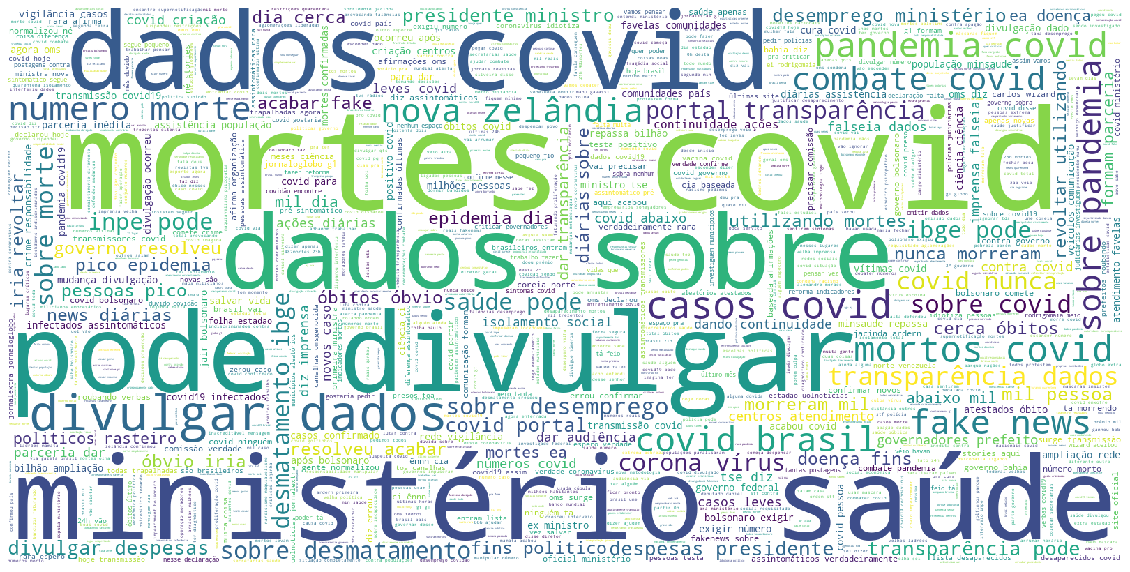

In [6]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, 
                      height=800, 
                      max_font_size=200, 
                      max_words=1000,
                      min_font_size=1).generate(text_full)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("covid.png")

Gerar a nuvem de palavras não foi difícil, não é mesmo? Perceba que gastamos a maior parte do nosso tempo nas etapas de coleta e preparação dos dados, enquanto a geração em si, fizemos em apenas um trecho de código. Isso é normal? Muito! Coletar e preparar os dados é a etapa mais importante na análise de dados!

Só um último lembrete: O WordCloud gera a imagem da nuvem no formato PNG. Você pode encontrá-la na mesma pasta que se encontra o notebook.

Vamos aproveitar o conjunto de textos que já montamos anteriormente para fazer uma WC sobre o Covid nos estados do Rio de Janeiro e São Paulo.

In [43]:
covid_rj = ' '.join([text for text in text if "rio janeiro" in text or "rj" in text])
covid_sp = ' '.join([text for text in text if "são paulo" in text or "sao paulo" in text or "sp" in text])

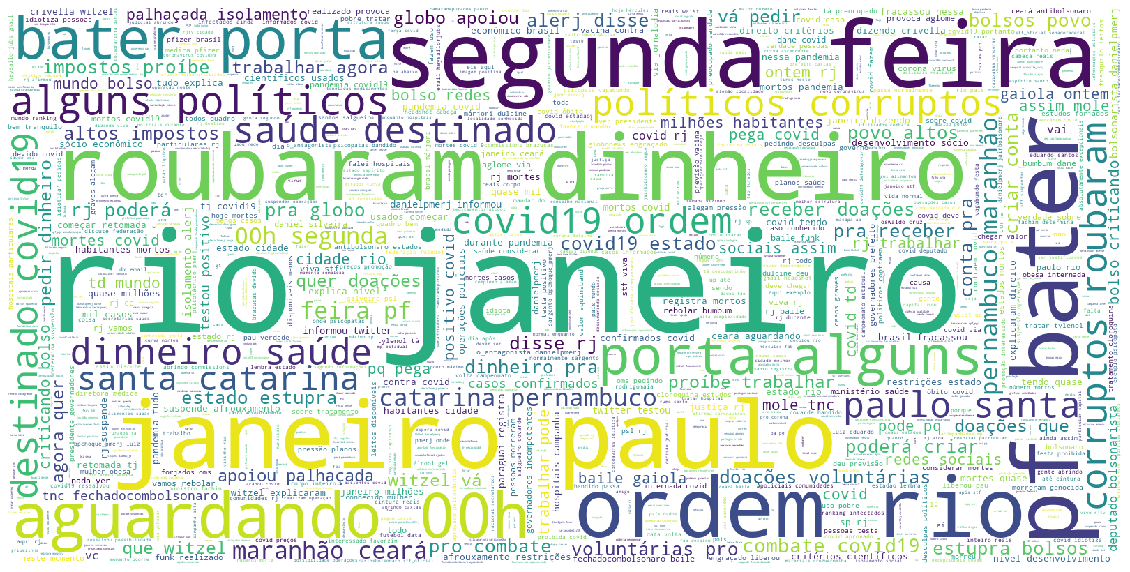

In [44]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, 
                      height=800, 
                      max_font_size=200, 
                      max_words=1000,
                      min_font_size=1).generate(covid_rj)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("covid_rj.png")

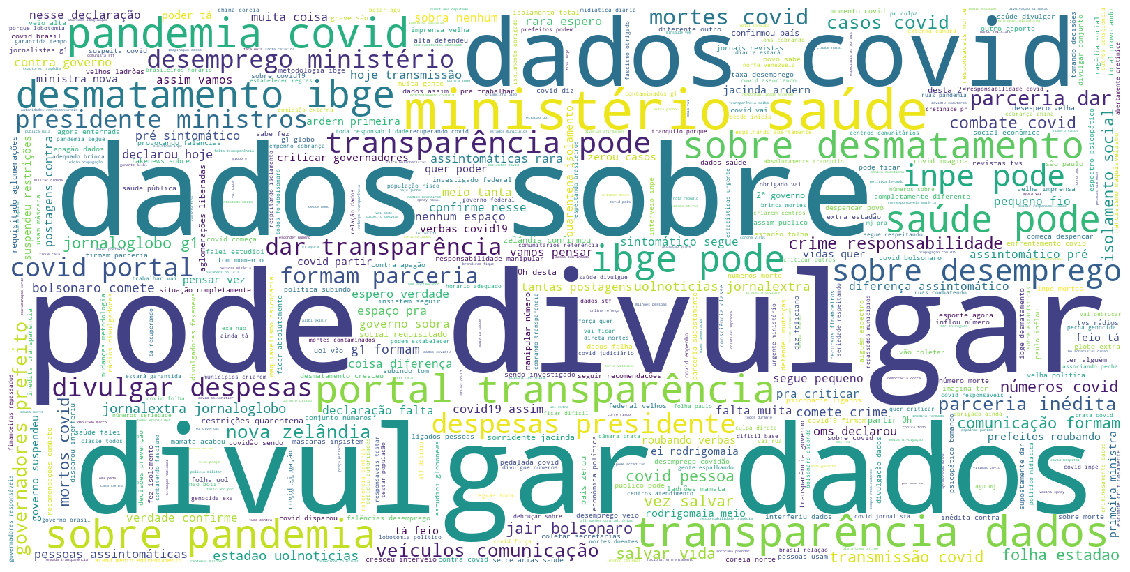

In [45]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, 
                      height=800, 
                      max_font_size=200, 
                      max_words=500,
                      min_font_size=1).generate(covid_sp)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("covid_sp.png")